<a href="https://colab.research.google.com/github/dakshayani2906/my-python-journey-basics/blob/main/Dakshayani_report_on_Austo_Automobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [99]:
df = pd.read_csv('data.csv')

In [100]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


This dataset talks about the age, Gender, profession, Marital_status, Education, No od fependednts, whether thet have personal loan and House loan, Their partner working status mentioned in yes/ no, Salary of the self and Partner and the total salary. Price of the SUV Make of the car like SUV, Sedan, Hatchback.

In [101]:
df.shape

(1581, 14)

This dataset consists of 1581 rows and 14 columns

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


All the columns have 1581 observations except Gender and Partner_Salary which has 1528 and 1475 observations indicating that there are some missing values in them

Price, Salary and Total_Salary are in 'int' data type but it should be in 'float' datatype.

The object type contains categories in them.

In [103]:
df.isnull().sum() # to find missing values

,0
Age,0
Gender,53
Profession,0
Marital_status,0
Education,0
No_of_Dependents,0
Personal_loan,0
House_loan,0
Partner_working,0
Salary,0


We see 53 gender and 106 partner_salary values are missing.

In [104]:
df.nunique()

,0
Age,33
Gender,4
Profession,2
Marital_status,2
Education,2
No_of_Dependents,5
Personal_loan,2
House_loan,2
Partner_working,2
Salary,538


In [105]:
df["Gender"].unique()

array(['Male', 'Femal', 'Female', nan, 'Femle'], dtype=object)

In [106]:
df['Gender'].value_counts()

,count
Gender,
Male,1199
Female,327
Femal,1
Femle,1


Male count is 1199

Female count is 329 (Adding spelling mistake one also)

There is a spelling mistake in Female as Femle adn Femal.

In [107]:
df.fillna({'Gender': df['Gender'].mode()[0]}, inplace = True)

In [108]:
# spelling correction

df['Gender'] = df['Gender'].replace('Femle', 'Female')
df['Gender'] = df['Gender'].replace('Femal', 'Female')

In [109]:
df['Partner_salary'].value_counts() # Checking missing values in Partner salary

,count
Partner_salary,
0.0,623
40500.0,29
40200.0,27
40000.0,25
40100.0,25
...,...
300.0,1
22300.0,1
500.0,1


There are 623 rows with Partner_salary is 0.

In [56]:
df.loc[(df['Partner_working'] == 'Yes'), 'Partner_salary'] =df['Total_salary']-df['Salary']
df.loc[(df['Partner_working'] == 'No'), 'Partner_salary'] =0

In [110]:
df.isnull().sum()

,0
Age,0
Gender,0
Profession,0
Marital_status,0
Education,0
No_of_Dependents,0
Personal_loan,0
House_loan,0
Partner_working,0
Salary,0


All the null values are treated.

In [111]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1475.0,20225.559322,19573.149277,0.0,0.0,25600.0,38300.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


The average age is around 32 years.

The min and max age are 22 and 54 years respectively.

The average No of dependents is 2, while min and max are 0 and 4.

The average Salary is 60400, while min and max are 30000 and 99300.

The average Partner salary is 25600, while min and max are 0 and 80500.

The average Total salary is 80000, while min and max are 30000 and 171000.

The average Price is 35600, while min and max are 18000 and 70000.


<Axes: title={'center': 'Count by Gender'}, xlabel='Gender of Buyer', ylabel='count'>

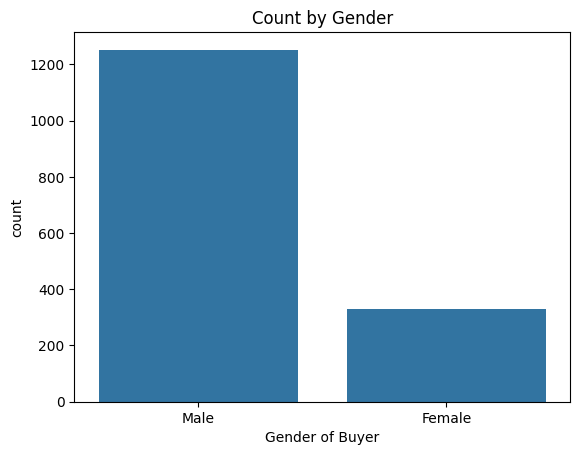

In [112]:
plt.title('Count by Gender')
plt.xlabel('Gender of Buyer')
sns.countplot(data = df, x = 'Gender')

There are 1199 males and 329 females.

<Axes: title={'center': 'Profession of Buyers'}, xlabel='Profession of Buyers', ylabel='Count of Buyers'>

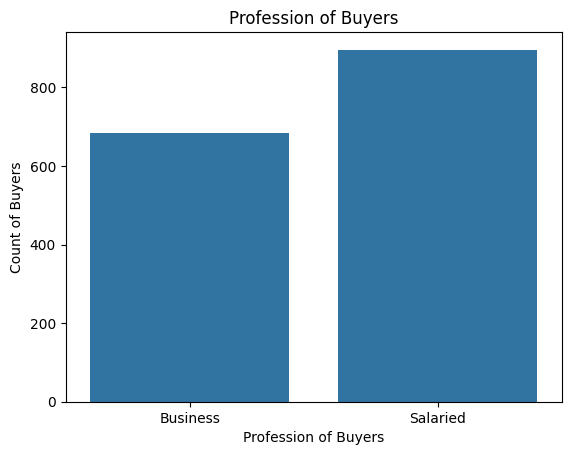

In [113]:
plt.title('Profession of Buyers')
plt.ylabel('Count of Buyers')
plt.xlabel('Profession of Buyers')
sns.countplot(data = df, x = 'Profession')

There are more Salaried individuals than Business individuals.

<Axes: title={'center': 'Bar graph of Buyers marital status'}, xlabel='Marital status of Buyer', ylabel='Count'>

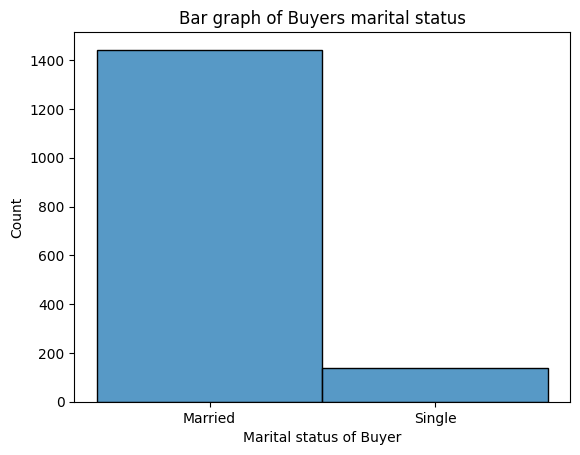

In [114]:
plt.xlabel('Marital status of Buyer')
plt.title('Bar graph of Buyers marital status')
sns.histplot(data = df, x = 'Marital_status')

Individuals who are married are buying more cars than Single.

<Axes: title={'center': 'Bar graph of Buyers Education'}, xlabel='Education of Buyer', ylabel='count'>

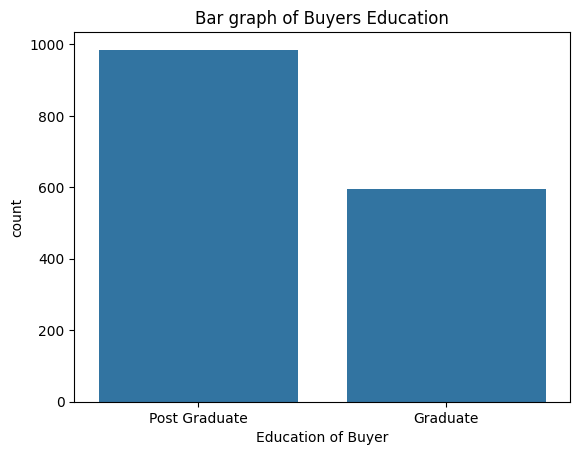

In [115]:
plt.xlabel('Education of Buyer')
plt.title('Bar graph of Buyers Education')
sns.countplot(data=df,x='Education')

<Axes: title={'center': 'Bar graph of Buyers loan'}, xlabel='Personal loan on Buyer', ylabel='count'>

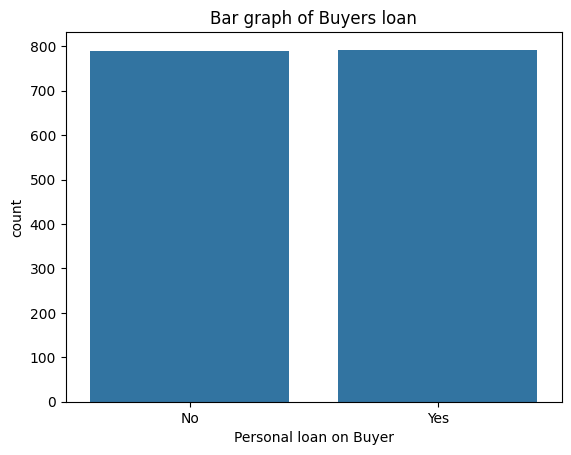

In [116]:
plt.xlabel('Personal loan on Buyer')
plt.title('Bar graph of Buyers loan')
sns.countplot(data=df,x='Personal_loan')

<Axes: title={'center': 'Number of Buyers who has House Loan'}, xlabel='House loan on buyer', ylabel='Count'>

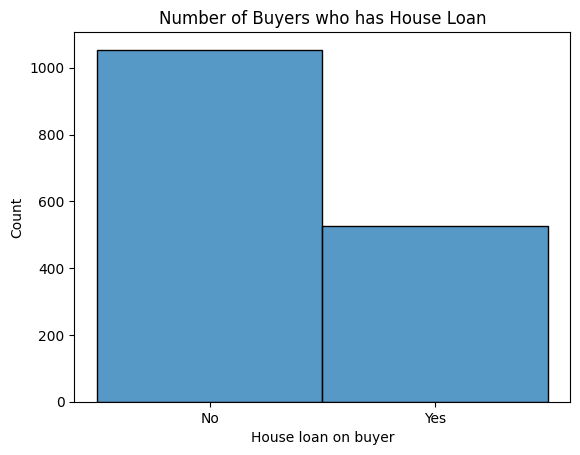

In [117]:
plt.xlabel('House loan on buyer')
plt.title('Number of Buyers who has House Loan')
sns.histplot(data=df, x='House_loan')

<Axes: title={'center': 'Status of Buyers Partner Working?'}, xlabel='Working Partner?', ylabel='Count of Buyers'>

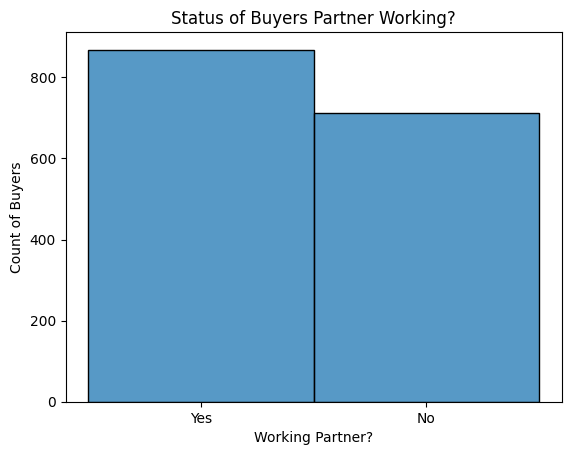

In [73]:
plt.title('Status of Buyers Partner Working?')
plt.xlabel('Working Partner?')
plt.ylabel('Count of Buyers')
sns.histplot(data=df, x='Partner_working')

<Axes: title={'center': 'Makes of Car'}, xlabel='Make of Cars Purchased', ylabel='Cars Purchased'>

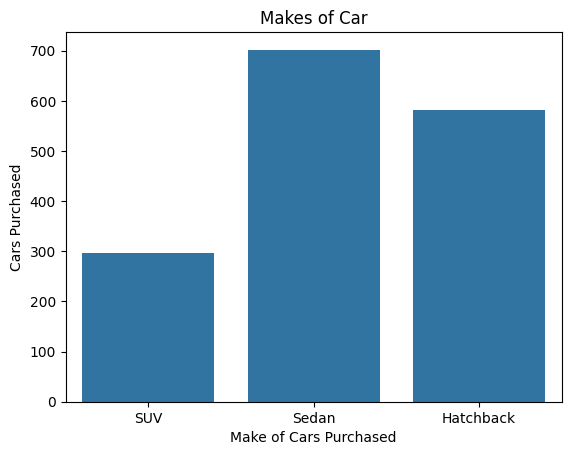

In [74]:
plt.title('Makes of Car')
plt.ylabel('Cars Purchased')
plt.xlabel('Make of Cars Purchased')
sns.countplot(data=df, x='Make')

<Axes: title={'center': 'Age of Individuals'}, xlabel='Age of Buyers', ylabel='Count'>

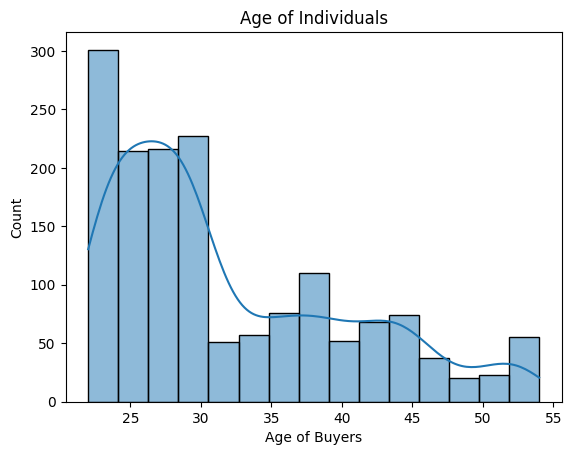

In [76]:
plt.title('Age of Individuals')
plt.xlabel('Age of Buyers')
sns.histplot(data=df, x='Age', kde='true')

<Axes: title={'center': 'Salary of Individuals'}, xlabel='Salary of Buyers', ylabel='Count'>

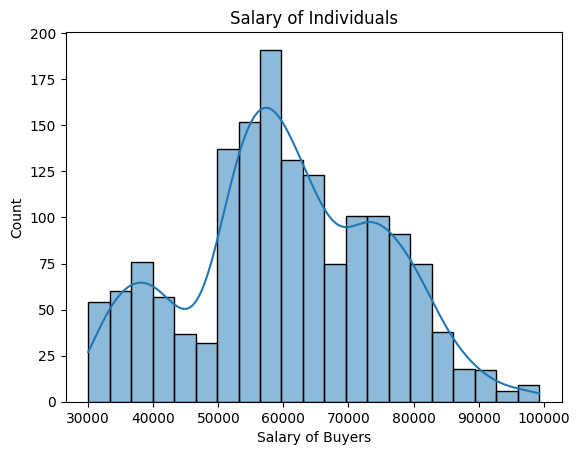

In [84]:
plt.title('Salary of Individuals')
plt.xlabel('Salary of Buyers')
sns.histplot(data=df, x='Salary', kde='true')

<Axes: title={'center': 'Bar graph of Buyers Partner Salary'}, xlabel='Salary of Partner', ylabel='Count'>

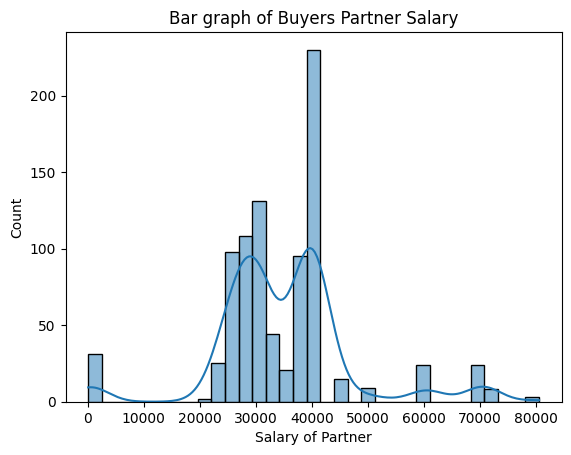

In [85]:
working_partner_yes=df[df['Partner_working'] == 'Yes']
plt.title('Bar graph of Buyers Partner Salary')
plt.xlabel('Salary of Partner')
sns.histplot(x=working_partner_yes['Partner_salary'], kde = 'true')

<Axes: title={'center': 'Total Salary of Buyer'}, xlabel='Total Salary of Buyer', ylabel='Count'>

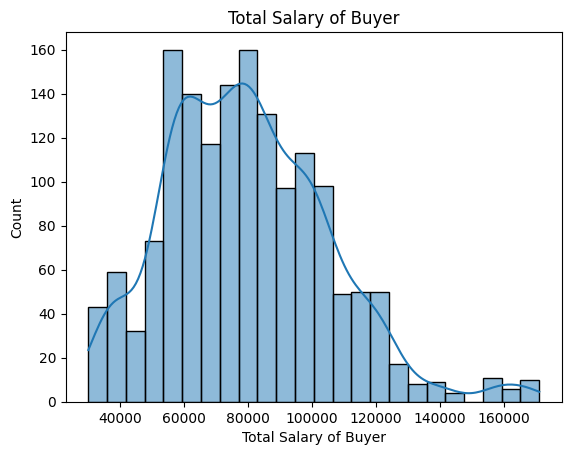

In [78]:
plt.title('Total Salary of Buyer')
plt.xlabel('Total Salary of Buyer')
sns.histplot(data=df, x='Total_salary', kde='true')


<Axes: title={'center': 'Bar graph of Buyers Partner Salary'}, xlabel='Salary of Partner', ylabel='Count'>

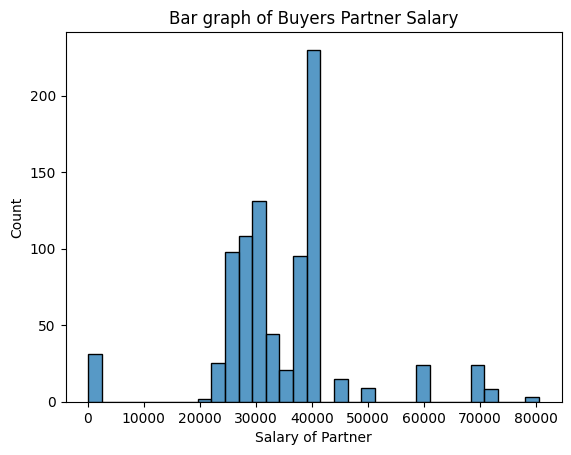

In [82]:
working_partner_yes=df[df['Partner_working'] == 'Yes']
plt.title('Bar graph of Buyers Partner Salary')
plt.xlabel('Salary of Partner')
sns.histplot(x=working_partner_yes['Partner_salary'])


<Axes: title={'center': 'Price of Cars'}, xlabel='Price of Car Purchased', ylabel='Count'>

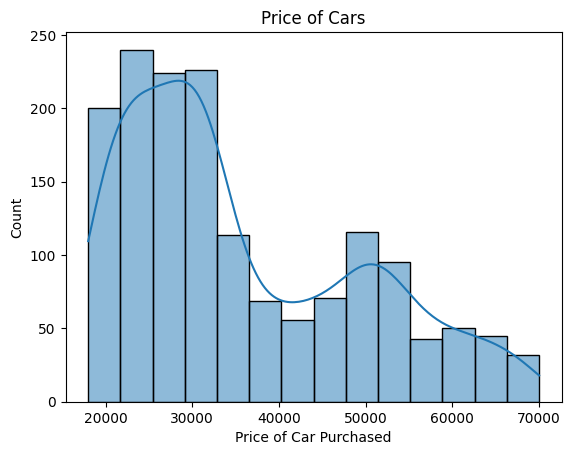

In [90]:
plt.title('Price of Cars')
plt.xlabel('Price of Car Purchased')
sns.histplot(data=df, x='Price', kde='true')


In [92]:
numerical_columns = ['Age','Salary', 'Total_salary','No_of_Dependents','Price','Partner_salary', 'Total_salary']

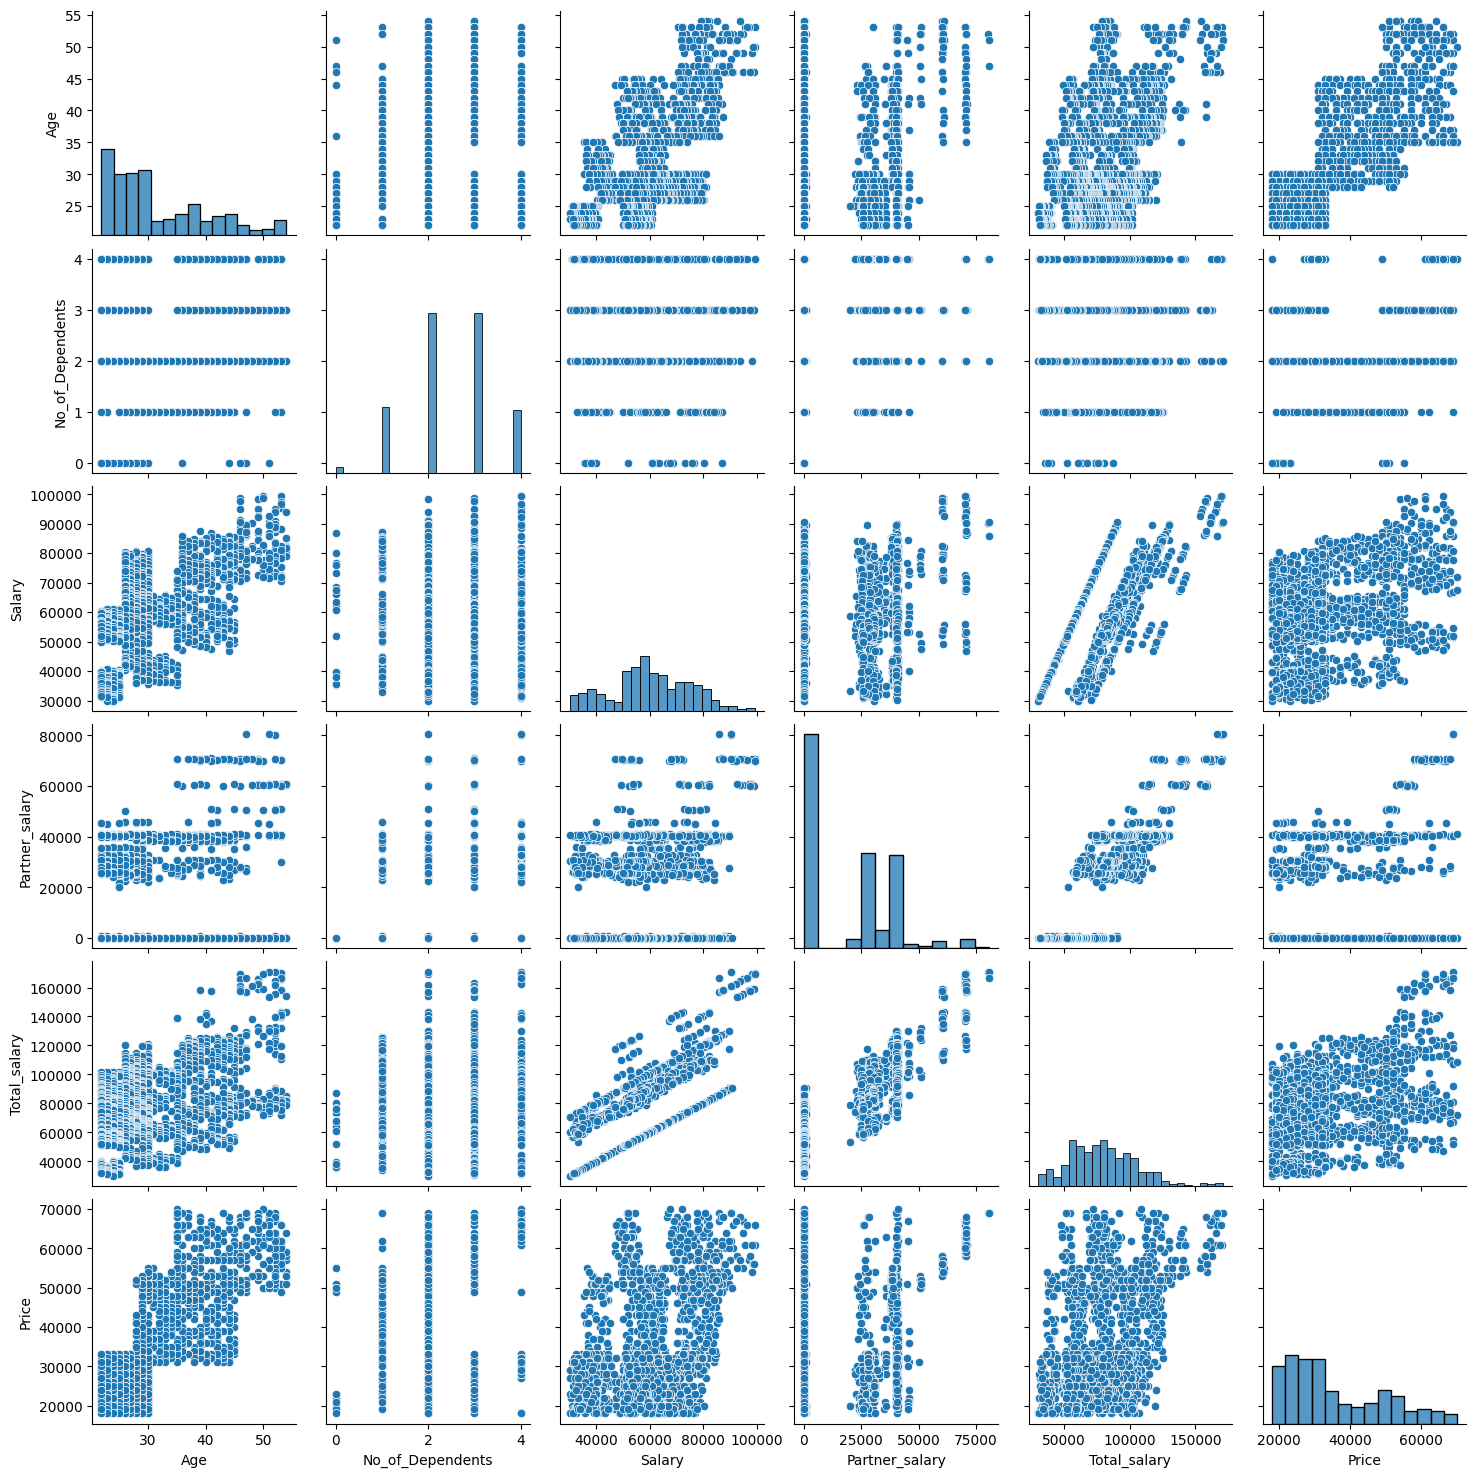

In [93]:
sns.pairplot(df)


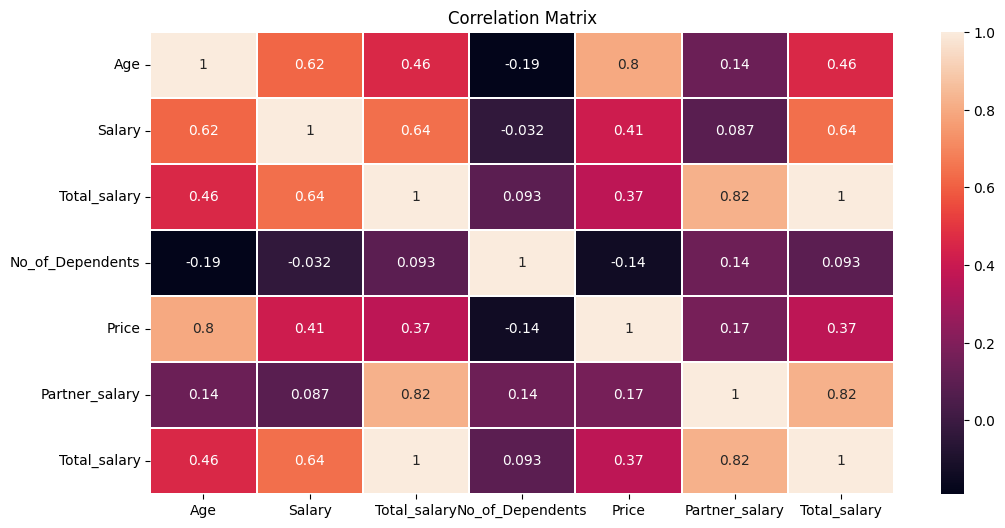

In [97]:
#Heatmap helps to analyze the relation between the variables
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.25)
plt.title('Correlation Matrix')
plt.xticks(rotation=0)
plt.show()
